In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import os

Matplotlib created a temporary cache directory at /tmp/matplotlib-r1jvsmjj because the default path (/home/grad/ccomp/23/matias.joao/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


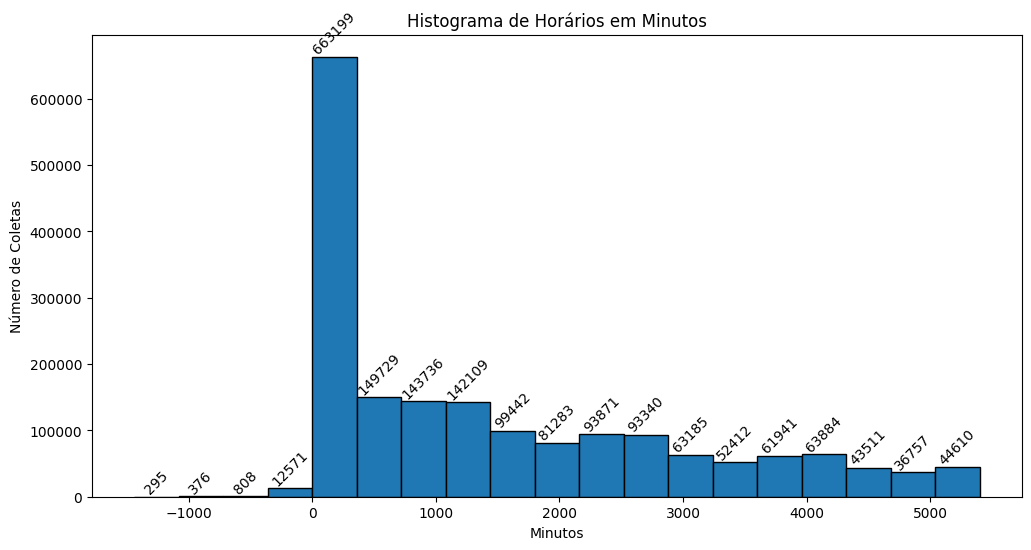

diagnosisoffset
(-1440.0, -1080.0]       293
(-1080.0, -720.0]        376
(-720.0, -360.0]         809
(-360.0, 0.0]          12984
(0.0, 360.0]          663357
(360.0, 720.0]        149544
(720.0, 1080.0]       143699
(1080.0, 1440.0]      142113
(1440.0, 1800.0]       99304
(1800.0, 2160.0]       81475
(2160.0, 2520.0]       93745
(2520.0, 2880.0]       93261
(2880.0, 3240.0]       63101
(3240.0, 3600.0]       52439
(3600.0, 3960.0]       61961
(3960.0, 4320.0]       63878
(4320.0, 4680.0]       43453
(4680.0, 5040.0]       36760
(5040.0, 5400.0]       44505
Name: count, dtype: int64


In [2]:
# Criar DataFrame
df = pd.read_csv("diagnosis.csv")

# Definir os intervalos de 6 em 6 horas (360 minutos)
bins = range(-1440, 5760, 360)

plt.figure(figsize=(12, 6))


# Criar o histograma
counts, bins, patches = plt.hist(df['diagnosisoffset'], bins=bins, edgecolor='black')

# Adicionar títulos e labels
plt.title('Histograma de Horários em Minutos')
plt.xlabel('Minutos')
plt.ylabel('Número de Coletas')

# Adicionar os números em cima das barras
for count, bin_patch in zip(counts, patches):
    height = bin_patch.get_height()
    plt.text(bin_patch.get_x() + bin_patch.get_width() / 2, height, int(count),
             ha='center', va='bottom', fontsize=10, rotation=45)


# Verificar se o diretório 'graficos' existe, e criar se não existir
output_dir = 'graficos'
os.makedirs(output_dir, exist_ok=True)

# Salvar o histograma em um arquivo
file_path = os.path.join(output_dir, 'DiagnosisHist.png')
plt.savefig(file_path)

# Mostrar o histograma
plt.show()

# Contar quantas coletas estão em cada intervalo
coletas_por_intervalo = pd.cut(df['diagnosisoffset'], bins=bins).value_counts().sort_index()
print(coletas_por_intervalo)
